<a href="https://colab.research.google.com/github/taegyunjjang/ml_study/blob/main/3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

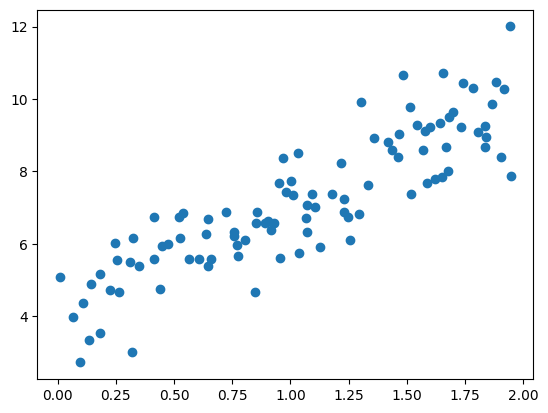

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = 2 * np.random.rand(100, 1)          # 0~1 사이의 균일분포, shape:100x1
y = 4 + 3 * x + np.random.randn(100, 1) # randn으로 noise term을 둠. normal 분포 mu=0, var=1, shape:100x1
plt.scatter(x, y)
plt.show()

In [ ]:
x_bias = np.c_[np.ones((100, 1)), x]  # noise term으로 완벽한 파라미터를 갖출 수는 없지만 최적의 파라미터

theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)
theta_best

array([[4.09586767],
       [2.95347904]])

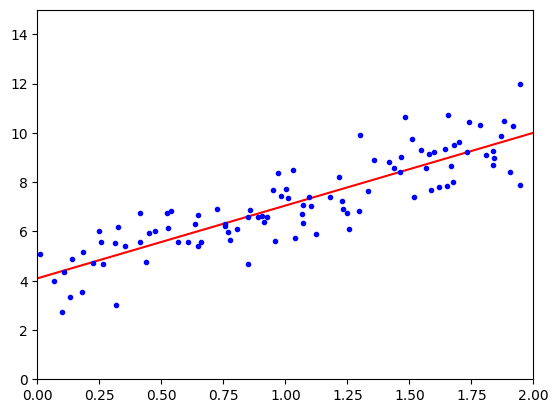

In [ ]:
# theta_bset를 이용해서 y값 예측
x_new = np.array([[0], [2]])
x_new_bias = np.c_[np.ones((2, 1)), x_new]  # np.ones을 통해 bias까지 학습

prediction = x_new_bias.dot(theta_best)
prediction

plt.plot(x_new, prediction, "r-")
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
prediction

array([[ 4.09586767],
       [10.00282574]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.09586767] [[2.95347904]]


In [ ]:
# 배치 경사 하강법 구현
import numpy as np

x = 2 * np.random.rand(100, 1)
x_bias = np.c_[np.ones((100, 1)), x]
y = 4 + 3 * np.random.randn(100, 1)

learning_rate = 0.001
iterations = 1000
m = x_bias.shape[0] # x의 데이터 수

theta = np.random.randn(2, 1)

for iteration in range(iterations):
  gradients = 2/m * x_bias.T.dot(x_bias.dot(theta) - y)
  theta = theta - (learning_rate * gradients)

theta

array([[2.02222921],
       [1.78667402]])

In [ ]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0, t1 = 5, 50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_bias.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_bias[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index + 1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

theta

array([[-1.3665348 ],
       [-1.22870504]])

In [ ]:
# 다항 회귀
import numpy as np
data_num = 1000
x = 3 * np.random.rand(data_num, 1) - 1  # 기존의 특성 행렬
y = 0.2 * (x**2) + np.random.randn(1000,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.40119055]
[-0.40119055  0.16095386]
[0.05090483] [[-0.04953711  0.22747528]]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, x, y):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
  train_errors, val_errors = [], []

  for num in range(1, len(x_train)):
    model.fit(x_train[:num], y_train[:num])
    y_train_predict = model.predict(x_train[:num])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:num], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), 'r-+',linewidth=2, label='train_set')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val_set')
  plt.legend()
  plt.show()

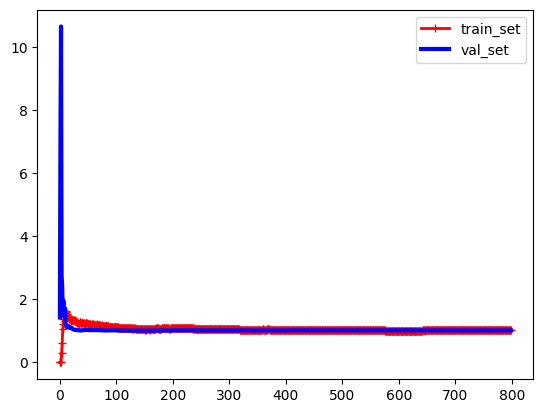

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

plot_learning_curves(lin_reg, x_poly, y)

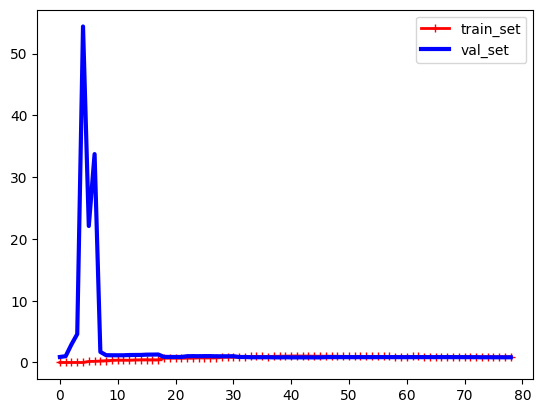

In [ ]:
from sklearn.pipeline import Pipeline

data_num = 100
x = 3 * np.random.rand(data_num, 1) - 1
y = 0.2 * x**2 + np.random.randn(100, 1)

polynomial_regression = Pipeline([
  ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
  ("lin_reg",LinearRegression())
  ])

plot_learning_curves(polynomial_regression, x, y)

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x = 3 * np.random.rand(data_num, 1) - 1
y = 0.2 * x**2 + np.random.randn(100, 1)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

# penalty : {‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’
# 'constant' : eta = eta0
# 'optimal' : eta = 1.0 / (alpha * (t + t0))
# 'invscaling' : eta = eta0 / pow(t, power_t)
# 'adaptive' : eta = eta0, as long as the training keeps decreasing
sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None,
                       learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)

  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

print('best_epoch : ', best_epoch)
print('best_model : ', best_model)

best_epoch :  0
best_model :  SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)
